PNT2022TMID26077 Testing The Model.

##IMPORT LIBRARIES

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

c:\Users\KAAD\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


##unzip the file



In [2]:
!unzip '/content/drive/MyDrive/IBMPROJECT/conversation engine for deaf and dumb.zip'

'unzip' is not recognized as an internal or external command,
operable program or batch file.


##DATA AUGMENTATION

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
x_train = train_datagen.flow_from_directory("../DATA COLLECTION/training_set", target_size=(64,64),batch_size=100,
                                            class_mode='categorical', color_mode ="grayscale")

Found 15130 images belonging to 1 classes.


In [6]:
x_test = test_datagen.flow_from_directory("../DATA COLLECTION/test_set", target_size=(64,64),batch_size=100,
                                         class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 1 classes.


In [7]:
len(x_train)

152

In [8]:
len(x_test)

23

In [9]:
x_train.class_indices

{'training_set': 0}

##MODEL BUILDING

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [11]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

C:\Users\KAAD\AppData\Local\Temp\ipykernel_676\43643550.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)


Epoch 1/10
30/30 [==============================] - 17s 534ms/step - loss: 508.9954 - accuracy: 0.2390 - val_loss: 2339.9592 - val_accuracy: 0.0000e+00
Epoch 2/10
30/30 [==============================] - 10s 333ms/step - loss: 13116.6680 - accuracy: 0.0667
Epoch 3/10
30/30 [==============================] - 10s 317ms/step - loss: 74648.5625 - accuracy: 0.1000
Epoch 4/10
30/30 [==============================] - 9s 308ms/step - loss: 183818.2188 - accuracy: 0.1000
Epoch 5/10
30/30 [==============================] - 9s 289ms/step - loss: 759477.4375 - accuracy: 0.1000
Epoch 6/10
30/30 [==============================] - 8s 276ms/step - loss: 2141109.7500 - accuracy: 0.1000
Epoch 7/10
30/30 [==============================] - 9s 284ms/step - loss: 4231762.5000 - accuracy: 0.1000
Epoch 8/10
30/30 [==============================] - 8s 271ms/step - loss: 10112945.0000 - accuracy: 0.0990
Epoch 9/10
30/30 [==============================] - 8s 264ms/step - loss: 20951426.0000 - accuracy: 0.1333
Ep

In [14]:
model.save('Real_time.h5')

##TEST THE MODEL




In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [18]:
model = load_model('Real_time.h5')

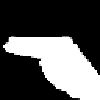

In [19]:
img = image.load_img('../DATA COLLECTION/test_set/test_set/H/107.png',target_size = (100,100))
img

In [20]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [22]:
img=image.load_img("../DATA COLLECTION/test_set/test_set/H/107.png")
detect(img)

1/1 [==============================] - 0s 172ms/step
THE PREDICTED LETTER IS  G


In [23]:
img = image.load_img('../DATA COLLECTION/test_set/test_set/A/110.png')
pred=detect(img)

1/1 [==============================] - 0s 36ms/step
THE PREDICTED LETTER IS  G


In [25]:
img=image.load_img('../DATA COLLECTION/test_set/test_set/E/111.png')
detect(img)

1/1 [==============================] - 0s 40ms/step
THE PREDICTED LETTER IS  G
